In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
df=pd.read_csv("height-weight.csv")

In [45]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

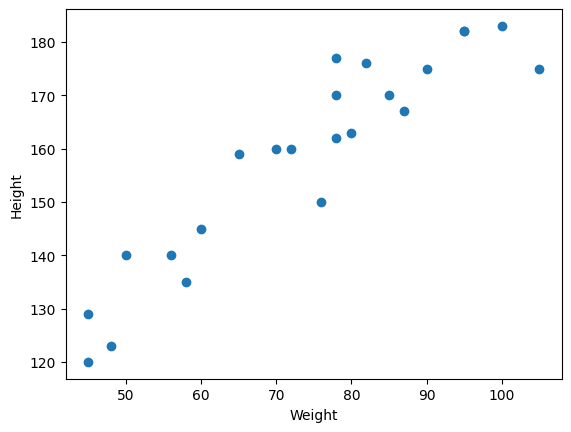

In [46]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [47]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


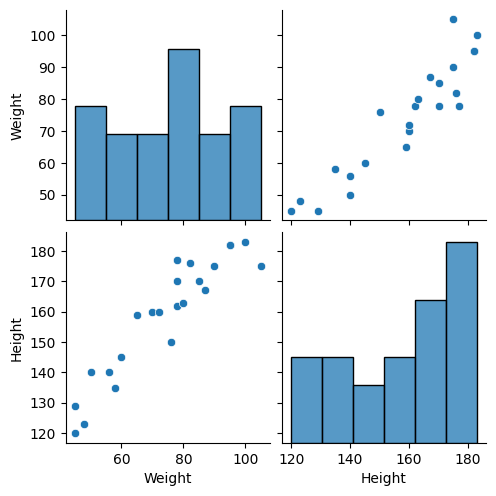

In [48]:
import seaborn as sns
sns.pairplot(df)

In [49]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [50]:
X=df[['Weight']]
Y=df['Height']

In [51]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [52]:
Y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [53]:
np.array(Y).shape

(23,)

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [55]:
X_train.shape

(17, 1)

In [56]:
X_test.shape

(6, 1)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [59]:
X_test=scaler.transform(X_test)

In [80]:
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

In [81]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
regression=LinearRegression(n_jobs=-1)

In [84]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [85]:
print("coefficient or slope:",regression.coef_)
print("intercept:",regression.intercept_)

coefficient or slope: [17.2982057]
intercept: 156.47058823529412


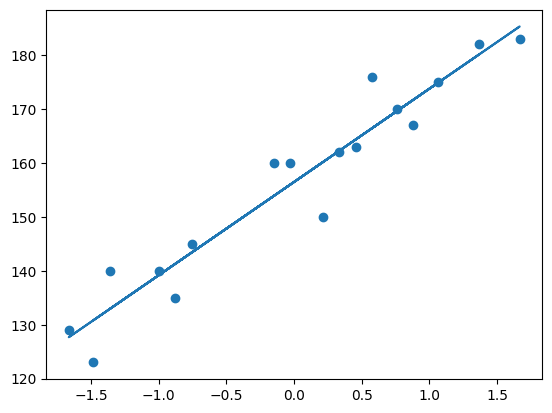

In [86]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [87]:
Y_pred=regression.predict(X_test)

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [89]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [90]:
from sklearn.metrics import r2_score
score=r2_score(Y_test, Y_pred)
print(score)

0.7360826717981276


In [91]:
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

In [92]:
import statsmodels.api as sm

model=sm.OLS(Y_train, X_train).fit()

In [93]:

model=sm.OLS(Y_train, X_train).fit()

In [94]:
prediction=model.predict(X_test)

print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [95]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Wed, 19 Nov 2025   Prob (F-statistic):                       0.664
Time:                        14:31:10   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\yashaswini.s\OneDrive\Desktop\height prediction\simple-linear-regression-height-prediction\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [96]:
regression.predict(scaler.transform([[72]]))

c:\Users\yashaswini.s\OneDrive\Desktop\height prediction\simple-linear-regression-height-prediction\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [97]:
import pickle

In [98]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [99]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [100]:
pickled_model.predict(scaler.transform([[72]]))

c:\Users\yashaswini.s\OneDrive\Desktop\height prediction\simple-linear-regression-height-prediction\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])